Overview of Below Code: 
* The below code organizes the dataframe and pulls the graded data from the other script in order to create dummy variables and prepare it for the OLS regression. It produces the summary table from the OLS and also creates visualizations for some variables. This was used to create the OLS for the simulated data for our third milestone (as seen below for the functions creating simulated data created in other scripts), and the OLS for our final paper. 


Packages Used for Data Analysis

In [8]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

Loading Data

In [9]:
# Using the Med Student Pre Assessment Data that is found on our Shared Google Drive
pre = pd.read_csv('../Downloads/Med student pre assessment 2.8.23 - Med student pre assessment 2.8.23.csv')
 
pre

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q12,Q13,Q22,Q23,Q53_1,Q53_2,Q53_3,Q53_4,Q53_5,SC0
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Which of the following are best practices in c...,If a patient with IDD-MH is acting out in the ...,Which is not a treatment approach that people ...,Which of the medications below are among those...,Please rate your level of agreement with the f...,Please rate your level of agreement with the f...,Please rate your level of agreement with the f...,Please rate your level of agreement with the f...,Please rate your level of agreement with the f...,Score
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID12""}","{""ImportId"":""QID13""}","{""ImportId"":""QID22""}","{""ImportId"":""QID23""}","{""ImportId"":""QID53_1""}","{""ImportId"":""QID53_2""}","{""ImportId"":""QID53_3""}","{""ImportId"":""QID53_4""}","{""ImportId"":""QID53_5""}","{""ImportId"":""SC_9zzmf9m2yTVbssm""}"
2,3/23/2022 9:42,3/23/2022 9:46,Survey Preview,NaN,100,229,TRUE,3/23/2022 9:46,R_djvqzijTB5L2Pjb,NaN,...,"Ask your patient exploratory questions,Talk to...","Discipline the person to get them to behave,Ge...","Extensive, long-term behavior modification tre...","lithium,quetiapine,divalproex",NaN,NaN,NaN,NaN,NaN,2
3,3/24/2022 13:30,3/24/2022 13:30,Survey Preview,NaN,100,4,TRUE,3/24/2022 13:30,R_2zqcz6JEOzFKMf0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/25/2022 10:00,3/25/2022 10:00,IP Address,184.174.134.134,100,9,TRUE,3/25/2022 10:00,R_12SvBoipzeVQw2d,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1/5/2023 6:12,1/5/2023 6:15,IP Address,129.170.195.199,52,185,FALSE,1/12/2023 6:15,R_1F8lTLDjFsvTPIG,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1/5/2023 6:13,1/5/2023 6:16,IP Address,129.170.195.196,52,214,FALSE,1/12/2023 6:17,R_1LhS0pfNjndIluO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,1/5/2023 6:16,1/5/2023 6:18,IP Address,129.170.195.220,52,125,FALSE,1/12/2023 6:18,R_ers03KIuDkTjyZr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,1/30/2023 16:41,1/30/2023 16:51,IP Address,130.189.175.200,100,561,TRUE,1/30/2023 16:51,R_1qdHEmkAfsxhxyD,NaN,...,Ask your patient exploratory questions,"Defer to the person’s caregiver,Give the patie...","Extensive, long-term behavior modification tre...",risperidone,Somewhat Disagree,Somewhat Disagree,Somewhat Disagree,Somewhat Disagree,Strongly Agree,17


Data Cleaning/Preprocessing

In [10]:
##Dropping irrelevant rows for preparation
pre_clean= pre.drop(0)

pre_clean=pre_clean.drop(1)

pre_clean

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q12,Q13,Q22,Q23,Q53_1,Q53_2,Q53_3,Q53_4,Q53_5,SC0
2,3/23/2022 9:42,3/23/2022 9:46,Survey Preview,NaN,100,229,TRUE,3/23/2022 9:46,R_djvqzijTB5L2Pjb,NaN,...,"Ask your patient exploratory questions,Talk to...","Discipline the person to get them to behave,Ge...","Extensive, long-term behavior modification tre...","lithium,quetiapine,divalproex",NaN,NaN,NaN,NaN,NaN,2
3,3/24/2022 13:30,3/24/2022 13:30,Survey Preview,NaN,100,4,TRUE,3/24/2022 13:30,R_2zqcz6JEOzFKMf0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/25/2022 10:00,3/25/2022 10:00,IP Address,184.174.134.134,100,9,TRUE,3/25/2022 10:00,R_12SvBoipzeVQw2d,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3/28/2022 14:40,3/28/2022 14:40,IP Address,174.19.98.252,100,5,TRUE,3/28/2022 14:40,R_2SH7E5DZhOsRjZh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3/28/2022 14:40,3/31/2022 6:21,IP Address,174.19.98.252,100,229238,TRUE,3/31/2022 6:21,R_3PhIpFxHA8Ho4s8,NaN,...,Know that people with the same disability will...,Get a copy of their behavior plan for the next...,"Extensive, long-term behavior modification tre...",lithium,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1/5/2023 6:12,1/5/2023 6:15,IP Address,129.170.195.199,52,185,FALSE,1/12/2023 6:15,R_1F8lTLDjFsvTPIG,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1/5/2023 6:13,1/5/2023 6:16,IP Address,129.170.195.196,52,214,FALSE,1/12/2023 6:17,R_1LhS0pfNjndIluO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,1/5/2023 6:16,1/5/2023 6:18,IP Address,129.170.195.220,52,125,FALSE,1/12/2023 6:18,R_ers03KIuDkTjyZr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,1/30/2023 16:41,1/30/2023 16:51,IP Address,130.189.175.200,100,561,TRUE,1/30/2023 16:51,R_1qdHEmkAfsxhxyD,NaN,...,Ask your patient exploratory questions,"Defer to the person’s caregiver,Give the patie...","Extensive, long-term behavior modification tre...",risperidone,Somewhat Disagree,Somewhat Disagree,Somewhat Disagree,Somewhat Disagree,Strongly Agree,17


In [12]:
#Removing NaN values
pre_clean = pre_clean[~pre_clean["SC0"].isna()]

The Regrading Process for Simulated Data (from other script)


In [47]:
#Dictionary for grading free response questions, from other script

import pandas as pd
import ipywidgets as widgets

questions_dict = {
    "question": [
        'The most common mental health conditions experienced by people with intellectual and developmental disabilities are:',
        'Which of the following statements are true about systems of care for people with intellectual and developmental disabilities? Select all correct answers.',
        'What are the three (3) most common medical conditions experienced by people with IDD?',
        'Which of the following statements are true when assessing aggression in patients with intellectual and developmental disabilities? Select all correct answers.',
        'Which of the following is not a common presentation of anxiety in people with intellectual and developmental disabilities and limited communication skills?',
        'Signs of psychosis in people with intellectual and developmental disabilities include which of the following? Select all correct answers.',
        'Which of the following are best practices in communicating with patients with IDD-MH and their families? Select all correct answers.',
        'If a patient with IDD-MH is acting out in the waiting room, you and your waiting room staff should: Select all correct answers.',
        'Which is not a treatment approach that people diagnosed with intellectual and developmental disabilities and OCD may need?',
        'Which of the medications below are among those that should be considered first when treating patients with intellectual and developmental disabilities and mania?Select all correct answers.'
    ],

    "options": [
        ['Personality Disorders, Psychotic Disorders & Trauma-Related Disorders','Anxiety, Depression, & Trauma-Related Disorders','Bipolar Disorder, Psychotic Disorders, & Trauma-Related Disorders','Depression, Psychotic Disorders & Schizophrenia'],
        ['In order to receive IDD services, the person must have a diagnosed intellectual or developmental disability, and must have impaired adaptive functioning','Medical providers may need to engage family members and other caregivers in the patient’s care','All people with IDD receive the same array of services', 'The majority of people with IDD receive care in institutions','The person’s case manager/service coordinator from the developmental disabilities service agency could be helpful at medical appointments'],
        ['Neurological disorder(s)','Leg pain', 'Asthma','Pain (ex:dental, ear)','Kidney Disease','Cardiovascular disease','GI problems (ex: constipation, GERD)'],
        ['Medical/biological issues should be ruled out first','Some genetic disorders can cause increased risk of mental health or medical issues','Constipation, dental pain and gastroesphogeal reflux are common medical causes of aggression that should be considered',"Aggression should be managed by your state's developmental disabilities service agency", "Behavior is a form of communication",'Psychosocial stressors don\'t need to be considered'],
        ['Irritability or aggression','Running away','Talking to inanimate objects','Withdrawal','Staring into space', 'Increased repetitive speech and movement'],
        ['talking to themselves, monologue','having an imaginary friend','Unusual interests', 'Lip smacking','Auditory hallucinations that are intrusive and distressing','Change from baseline behavior','Covering ears/eyes'],
        ['Ask your patient exploratory questions','Talk to, and engage with, the patients’ caregiver rather than the patient themselves','Ask questions other than that directly pertain to the reason for the visit', 'Know that people with the same disability will always communicate in the same way'],
        ['Discipline the person to get them to behave','Get a copy of their behavior plan for the next time they are in your office','Administer a PRN',"Defer to the person's caregiver", 'Give the patient the option to wait outside or in the car']
        ],

        "correct_answers": [
        ['Anxiety, Depression, & Trauma-Related Disorders'],
        ['In order to receive IDD services, the person must have a diagnosed intellectual or developmental disability, and must have impaired adaptive functioning'],
        ['Medical providers may need to engage family members and other caregivers in the patient’s care'],
        ['The person’s case manager/service coordinator from the developmental disabilities service agency could be helpful at medical appointments'],
        ['Neurological disorder(s)','Pain (ex: dental, ear)','GI problems (ex: constipation, GERD)'],
        ['Medical/biological issues should be ruled out first','Some genetic disorders can cause increased risk of mental health or medical issues'],
        ['Constipation, dental pain and gastroesphogeal reflux are common medical causes of aggression that should be considered','Behavior is a form of communication'],                 
        ['Talking to inanimate objects'],
        ['Auditory hallucinations that are intrusive and distressing','Change from baseline behavior','Covering ears/eyes'],
        ['Ask your patient exploratory questions','Ask questions other than that directly pertain to the reason for the visit'],
        ['Defer to the person’s caregiver'],
        ['Combination treatment, including pharmacotherapy/manualized psychotherapies'],
        ['lithium','divalproex','aripiprazole','risperidone']]
        
        }

# questions_dict

                

Preliminary Data Analysis

In [171]:
#Importing pandas and NumPy
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import random
import re

In [13]:
#Means of Correct Scores for Multiple Choice Answers


correct_columns= ['Q6_correct','Q37_correct', 'Q13_correct', 'Q22_correct']  


correct_percentages={}
for col in correct_columns:
    percentage_correct = pre_clean[col].mean() *100
    correct_percentages[col] = percentage_correct

summary_df = pd.DataFrame.from_dict(correct_percentages, orient='index', columns=['Percentage correct'])
summary_df

,Percentage correct
Q6_correct,86.075949
Q37_correct,53.164557
Q13_correct,1.265823
Q22_correct,22.784810


In [14]:
pre_clean["Q6_correct_cat"] = pre_clean["Q6_correct"].values.astype("str")
pre_clean["Q6_correct_cat"].value_counts()

1.0    68
0.0    11
Name: Q6_correct_cat, dtype: int64

In [152]:
#Initial ideal code
#results = smf.ols('SC0 ~ Q6_correct_cat', data = pre_clean)
#results.fit()
#results.summary()

In [101]:
#CODE FOR CREATING SIMULATED DATA

import random

partial_credit_questions = {
    'Q31': 0.8,
    'Q34': 0.6,
    'Q36': 0.7,
    'Q39': 0.4,
    'Q12': 0.8,
    'Q22': 0.5
}

decimal_probabilities = {
    'Q31': 0.1,
    'Q34': 0.3,
    'Q36': 0.4,
    'Q39': 0.3,
    'Q12': 0.1,
    'Q22': 0.2
}

binary_values = []

for i in range(79):
    row = []
    for j in range(9):
        if df.columns[j] in partial_credit_questions and random.random() < partial_credit_questions[df.columns[j]]:
            if random.random() < decimal_probabilities[df.columns[j]]:
                row.append(round(random.uniform(0.5, 1), 1))
            else:
                row.append(1)
        else:
            row.append(random.randint(0, 1))
    binary_values.append(row)


df = pd.DataFrame(binary_values, columns=['Q6', 'Q31', 'Q34', 'Q36', 'Q37', 'Q39', 'Q12', 'Q13', 'Q22'])



print(df.tail(n=40))





    Q6  Q31  Q34  Q36  Q37  Q39  Q12  Q13  Q22
39   1  1.0  1.0  1.0    1  1.0  1.0    0  1.0
40   1  1.0  1.0  0.0    1  1.0  1.0    0  1.0
41   0  1.0  0.8  1.0    0  1.0  1.0    0  1.0
42   1  0.0  0.8  0.0    0  0.0  1.0    1  1.0
43   0  1.0  0.0  1.0    0  1.0  1.0    0  1.0
44   1  1.0  1.0  1.0    0  1.0  1.0    1  0.0
45   0  1.0  0.0  1.0    1  0.5  1.0    0  1.0
46   1  1.0  0.0  1.0    0  1.0  1.0    0  0.0
47   1  1.0  0.0  1.0    1  1.0  1.0    0  1.0
48   1  1.0  1.0  1.0    0  1.0  1.0    0  1.0
49   1  0.0  1.0  0.0    1  1.0  1.0    1  1.0
50   0  0.7  1.0  1.0    0  1.0  1.0    1  1.0
51   0  1.0  0.0  0.5    0  1.0  0.9    0  1.0
52   1  1.0  1.0  1.0    0  1.0  1.0    0  1.0
53   0  1.0  0.0  0.7    1  1.0  1.0    1  1.0
54   1  1.0  0.0  1.0    0  0.0  1.0    0  1.0
55   0  1.0  0.0  0.0    1  0.7  1.0    1  0.0
56   1  1.0  1.0  1.0    1  1.0  1.0    1  1.0
57   0  1.0  1.0  0.5    1  1.0  1.0    1  1.0
58   1  1.0  0.0  1.0    1  0.0  1.0    1  1.0
59   0  1.0  

In [17]:
#Code for running real data .csv from other script

data = pd.read_csv('../Downloads/scores_df.csv')
data.reset_index(drop=True)
pre_clean.reset_index(drop=True)
pre_clean.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q52', 'Q1', 'Q1_9_TEXT', 'Q25',
       'Q26', 'Q26_6_TEXT', 'Q27', 'Q27_9_TEXT', 'Q28', 'Q28_4_TEXT', 'Q29',
       'Q29_3_TEXT', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q10', 'Q30', 'Q31', 'Q34',
       'Q36', 'Q37', 'Q39', 'Q11', 'Q12', 'Q13', 'Q22', 'Q23', 'Q53_1',
       'Q53_2', 'Q53_3', 'Q53_4', 'Q53_5', 'SC0'],
      dtype='object')

In [14]:
pre_clean = pre_clean[(pre_clean["Finished"] == "TRUE")]

pre_clean = pre_clean[(pre_clean["Q52"] != 'Click here if you decline to participate in the research study')]

df_q_only = pre_clean.iloc[:, 20:]

#df_q_only = df_q_only.drop(["Q10", "Q30", "Q11","Q53_1","Q53_2","Q53_3","Q53_4","Q53_5","SC0"], axis=1)

#df_q_only.head()

analyze = df_q_only ; analyze

analyze.reset_index(drop = True)


,Q25,Q26,Q26_6_TEXT,Q27,Q27_9_TEXT,Q28,Q28_4_TEXT,Q29,Q29_3_TEXT,Q2,...,Q12,Q13,Q22,Q23,Q53_1,Q53_2,Q53_3,Q53_4,Q53_5,SC0
0,33-40,Non-binary,NaN,Asian,NaN,Non-Hispanic,NaN,English,NaN,None,...,"Ask your patient exploratory questions,Talk to...","Discipline the person to get them to behave,Ge...","Extensive, long-term behavior modification tre...","lithium,quetiapine,divalproex",NaN,NaN,NaN,NaN,NaN,2
1,41-50,Male,NaN,Other,NaN,Non-Hispanic,NaN,English,NaN,Moderate amount,...,Know that people with the same disability will...,Get a copy of their behavior plan for the next...,"Extensive, long-term behavior modification tre...",lithium,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,-1
2,26-32,Female,NaN,Asian,NaN,Other,Tamil Indian,English,NaN,Some,...,Ask your patient exploratory questions,Get a copy of their behavior plan for the next...,"Extensive, long-term behavior modification tre...","aripiprazole,risperidone",Strongly Disagree,Strongly Agree,Somewhat Disagree,Somewhat Disagree,Somewhat Agree,14
3,26-32,Male,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,"Ask your patient exploratory questions,Ask que...",Give the patient the option to wait outside or...,"Extensive, long-term behavior modification tre...",risperidone,Strongly Disagree,Strongly Disagree,Somewhat Disagree,Somewhat Disagree,Somewhat Agree,18
4,33-40,Female,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,"Ask your patient exploratory questions,Ask que...",Get a copy of their behavior plan for the next...,"Extensive, long-term behavior modification tre...","lithium,divalproex",Strongly Disagree,Somewhat Agree,Strongly Disagree,Somewhat Agree,Somewhat Agree,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,26-32,Female,NaN,Hispanic,Latinx,Hispanic/Latino of any race,NaN,English,NaN,Some,...,Ask your patient exploratory questions,Get a copy of their behavior plan for the next...,"Extensive, long-term behavior modification tre...",lithium,Strongly Disagree,Somewhat Disagree,Strongly Disagree,Somewhat Disagree,Somewhat Agree,10
75,18-25,Female,NaN,Hispanic,NaN,Hispanic/Latino of any race,NaN,English,NaN,Some,...,"Ask your patient exploratory questions,Ask que...",Get a copy of their behavior plan for the next...,An extensive review of previous diagnoses and ...,"divalproex,aripiprazole",Somewhat Disagree,Somewhat Disagree,Somewhat Agree,Strongly Agree,Somewhat Agree,14
76,18-25,Male,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,Ask your patient exploratory questions,Get a copy of their behavior plan for the next...,"Combination treatment, including pharmacothera...",lithium,Somewhat Disagree,Somewhat Disagree,Somewhat Disagree,Somewhat Agree,Somewhat Disagree,11
77,18-25,Female,NaN,Other,NaN,Non-Hispanic,NaN,English,NaN,Some,...,Ask questions other than that directly pertain...,Give the patient the option to wait outside or...,"Combination treatment, including pharmacothera...",lithium,Strongly Disagree,Somewhat Disagree,Somewhat Disagree,Somewhat Agree,Somewhat Agree,11


In [15]:
#Dropping original columns to prepare for drop
#analyze.drop(["Q6",  "Q31",  "Q34",  "Q36",  "Q37",  "Q39",  "Q12",  "Q13",  "Q22"], axis=1)
analyze = analyze.reset_index(drop=True)
analyze


,Q25,Q26,Q26_6_TEXT,Q27,Q27_9_TEXT,Q28,Q28_4_TEXT,Q29,Q29_3_TEXT,Q2,...,Q12,Q13,Q22,Q23,Q53_1,Q53_2,Q53_3,Q53_4,Q53_5,SC0
0,33-40,Non-binary,NaN,Asian,NaN,Non-Hispanic,NaN,English,NaN,None,...,"Ask your patient exploratory questions,Talk to...","Discipline the person to get them to behave,Ge...","Extensive, long-term behavior modification tre...","lithium,quetiapine,divalproex",NaN,NaN,NaN,NaN,NaN,2
1,41-50,Male,NaN,Other,NaN,Non-Hispanic,NaN,English,NaN,Moderate amount,...,Know that people with the same disability will...,Get a copy of their behavior plan for the next...,"Extensive, long-term behavior modification tre...",lithium,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,-1
2,26-32,Female,NaN,Asian,NaN,Other,Tamil Indian,English,NaN,Some,...,Ask your patient exploratory questions,Get a copy of their behavior plan for the next...,"Extensive, long-term behavior modification tre...","aripiprazole,risperidone",Strongly Disagree,Strongly Agree,Somewhat Disagree,Somewhat Disagree,Somewhat Agree,14
3,26-32,Male,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,"Ask your patient exploratory questions,Ask que...",Give the patient the option to wait outside or...,"Extensive, long-term behavior modification tre...",risperidone,Strongly Disagree,Strongly Disagree,Somewhat Disagree,Somewhat Disagree,Somewhat Agree,18
4,33-40,Female,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,"Ask your patient exploratory questions,Ask que...",Get a copy of their behavior plan for the next...,"Extensive, long-term behavior modification tre...","lithium,divalproex",Strongly Disagree,Somewhat Agree,Strongly Disagree,Somewhat Agree,Somewhat Agree,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,26-32,Female,NaN,Hispanic,Latinx,Hispanic/Latino of any race,NaN,English,NaN,Some,...,Ask your patient exploratory questions,Get a copy of their behavior plan for the next...,"Extensive, long-term behavior modification tre...",lithium,Strongly Disagree,Somewhat Disagree,Strongly Disagree,Somewhat Disagree,Somewhat Agree,10
75,18-25,Female,NaN,Hispanic,NaN,Hispanic/Latino of any race,NaN,English,NaN,Some,...,"Ask your patient exploratory questions,Ask que...",Get a copy of their behavior plan for the next...,An extensive review of previous diagnoses and ...,"divalproex,aripiprazole",Somewhat Disagree,Somewhat Disagree,Somewhat Agree,Strongly Agree,Somewhat Agree,14
76,18-25,Male,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,Ask your patient exploratory questions,Get a copy of their behavior plan for the next...,"Combination treatment, including pharmacothera...",lithium,Somewhat Disagree,Somewhat Disagree,Somewhat Disagree,Somewhat Agree,Somewhat Disagree,11
77,18-25,Female,NaN,Other,NaN,Non-Hispanic,NaN,English,NaN,Some,...,Ask questions other than that directly pertain...,Give the patient the option to wait outside or...,"Combination treatment, including pharmacothera...",lithium,Strongly Disagree,Somewhat Disagree,Somewhat Disagree,Somewhat Agree,Somewhat Agree,11


In [23]:
#Creation of dummy variables

#Races
merged_df['White'] = merged_df['Q27'].apply(lambda x: 1 if x == 'White' else 0) #Not used, as Whiteness was the reference group
merged_df['Asian'] = merged_df['Q27'].apply(lambda x: 1 if x == 'Asian' else 0)
merged_df['Hispanic'] = merged_df['Q27'].apply(lambda x: 1 if x == 'Hispanic' else 0)

#Gender
merged_df['Male'] = merged_df['Q26'].apply(lambda x: 1 if x == 'Male' else 0)
merged_df['Female'] = merged_df['Q26'].apply(lambda x: 1 if x == 'Female' else 0)

#Age
age_map = {'18-25': 1, '26-32': 2, '33-40': 3, '41-50': 4}
merged_df['Age'] = merged_df['Q25'].apply(lambda x: age_map.get(x, 0))

#Primary Language
merged_df['Primary'] = merged_df['Q29'].apply(lambda x: 1 if x == 'English' else 0)

#Experience
exp_map = {'None': 0, 'Very little': 1, 'Some': 2, 'Moderate amount': 3, 'Extensive': 4}
merged_df['Experience'] = merged_df['Q2'].apply(lambda x: exp_map.get(x, 0))

#Training 
merged_df['Training'] = merged_df['Q3'].apply(lambda x: exp_map.get(x, 0))

merged_df.head()

,Q25,Q26,Q26_6_TEXT,Q27,Q27_9_TEXT,Q28,Q28_4_TEXT,Q29,Q29_3_TEXT,Q2,...,q23_answers,White,Asian,Hispanic,Male,Female,Age,Primary,Experience,Training
0,33-40,Non-binary,NaN,Asian,NaN,Non-Hispanic,NaN,English,NaN,None,...,0.625,0,1,0,0,0,3,1,0,0
1,41-50,Male,NaN,Other,NaN,Non-Hispanic,NaN,English,NaN,Moderate amount,...,0.125,0,0,0,1,0,4,1,3,0
2,26-32,Female,NaN,Asian,NaN,Other,Tamil Indian,English,NaN,Some,...,0.250,0,1,0,0,1,2,1,2,2
3,26-32,Male,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,0.875,1,0,0,1,0,2,1,2,2
4,33-40,Female,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,0.250,1,0,0,0,1,3,1,2,1


In [60]:
#Accounting for questions that weren't considered in the frame of the data

merged_df['SC0'] = pd.to_numeric(merged_df['SC0'], errors='coerce')
merged_df['SC0'] = merged_df['SC0'] - 3
merged_df['SC0']

0     -7
1    -10
2      5
3      9
4      9
      ..
74     1
75     5
76     2
77     2
78     8
Name: SC0, Length: 79, dtype: int64

OLS Regression Models

In [62]:
import statsmodels.formula.api as smf

#Model 1
#model = smf.ols('SC0 ~ Q6_y + Q31_y + Q34_y + Q36_y + Q37_y + Q39_y + Q12_y + Q13_y + Q22_y', data=merged_df)
#result = model.fit()
#print(result.summary())


In [136]:
#Model 2
model = smf.ols('SC0 ~ Q6_y + Q31_y + Q34_y + Q36_y + Q37_y + Q39_y + Q12_y + Q13_y + Q22_y + Age + White + Asian + Hispanic + Male + Female + Primary + Experience + Training', data=merged_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    SC0   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1.308
Date:                Sun, 05 Mar 2023   Prob (F-statistic):              0.216
Time:                        23:24:07   Log-Likelihood:                -201.94
No. Observations:                  79   AIC:                             441.9
Df Residuals:                      60   BIC:                             486.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2082      4.885      1.885      0.0

In [137]:
#Model 3
model = smf.ols('SC0 ~ Q6_y + Q31_y  + Q36_y + Q39_y + Q22_y + Age + White + Asian + Hispanic + Male + Female + Primary + Experience + Training', data=merged_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    SC0   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1.612
Date:                Sun, 05 Mar 2023   Prob (F-statistic):             0.0999
Time:                        23:38:09   Log-Likelihood:                -203.08
No. Observations:                  79   AIC:                             436.2
Df Residuals:                      64   BIC:                             471.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2553      4.489      2.062      0.0

In [21]:
#Running actual regressions on real data

merged_df = analyze.merge(data, left_index=True, right_index=True, how='right')
merged_df

,Q25,Q26,Q26_6_TEXT,Q27,Q27_9_TEXT,Q28,Q28_4_TEXT,Q29,Q29_3_TEXT,Q2,...,q6_answers,q31_answers,q34_answers,q36_answers,q37_answers,q39_answers,q12_answers,q13_answers,q22_answers,q23_answers
0,33-40,Non-binary,NaN,Asian,NaN,Non-Hispanic,NaN,English,NaN,None,...,1,1.00,1.00,1.0,0,1.000000,1.0,0,0,0.625
1,41-50,Male,NaN,Other,NaN,Non-Hispanic,NaN,English,NaN,Moderate amount,...,1,1.00,0.66,1.0,0,0.666667,1.0,0,0,0.125
2,26-32,Female,NaN,Asian,NaN,Other,Tamil Indian,English,NaN,Some,...,1,1.00,1.00,1.0,0,1.000000,1.0,0,0,0.250
3,26-32,Male,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,1,1.00,1.00,1.0,1,1.000000,0.5,0,0,0.875
4,33-40,Female,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,1,1.00,0.66,1.0,1,0.666667,0.5,0,0,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,26-32,Female,NaN,Hispanic,Latinx,Hispanic/Latino of any race,NaN,English,NaN,Some,...,1,1.00,0.33,0.0,1,0.333333,1.0,0,1,0.125
75,18-25,Female,NaN,Hispanic,NaN,Hispanic/Latino of any race,NaN,English,NaN,Some,...,1,0.33,0.66,0.0,0,0.000000,0.5,0,0,0.125
76,18-25,Male,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,0,0.33,0.66,1.0,0,0.000000,0.5,0,0,0.375
77,18-25,Female,NaN,Other,NaN,Non-Hispanic,NaN,English,NaN,Some,...,0,0.33,0.00,0.0,0,0.000000,0.0,0,0,0.125


In [34]:
merged_df

,Q25,Q26,Q26_6_TEXT,Q27,Q27_9_TEXT,Q28,Q28_4_TEXT,Q29,Q29_3_TEXT,Q2,...,q23_answers,White,Asian,Hispanic,Male,Female,Age,Primary,Experience,Training
0,33-40,Non-binary,NaN,Asian,NaN,Non-Hispanic,NaN,English,NaN,None,...,0.625,0,1,0,0,0,3,1,0,0
1,41-50,Male,NaN,Other,NaN,Non-Hispanic,NaN,English,NaN,Moderate amount,...,0.125,0,0,0,1,0,4,1,3,0
2,26-32,Female,NaN,Asian,NaN,Other,Tamil Indian,English,NaN,Some,...,0.250,0,1,0,0,1,2,1,2,2
3,26-32,Male,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,0.875,1,0,0,1,0,2,1,2,2
4,33-40,Female,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,0.250,1,0,0,0,1,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,26-32,Female,NaN,Hispanic,Latinx,Hispanic/Latino of any race,NaN,English,NaN,Some,...,0.125,0,0,1,0,1,2,1,2,1
75,18-25,Female,NaN,Hispanic,NaN,Hispanic/Latino of any race,NaN,English,NaN,Some,...,0.125,0,0,1,0,1,1,1,2,0
76,18-25,Male,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,0.375,1,0,0,1,0,1,1,2,1
77,18-25,Female,NaN,Other,NaN,Non-Hispanic,NaN,English,NaN,Some,...,0.125,0,0,0,0,1,1,1,2,1


In [6]:
import statsmodels.formula.api as smf

In [30]:
test = merged_df

In [38]:
import pandas as pd

# replace the dummy variable names with the actual race names
test = test.replace({'Hispanic': 'Hispanic', 'Asian': 'Asian', 'White': 'White'})

# create a new categorical variable with "White" as the reference group
test['race'] = pd.Categorical(test[['White', 'Asian', 'Hispanic']].idxmax(axis=1),
                              categories=['Asian', 'Hispanic', 'White'], ordered=True)
test['race'] = test['race'].cat.set_categories(['White', 'Asian', 'Hispanic'], ordered=True)


In [39]:
test

,Q25,Q26,Q26_6_TEXT,Q27,Q27_9_TEXT,Q28,Q28_4_TEXT,Q29,Q29_3_TEXT,Q2,...,White,Asian,Hispanic,Male,Female,Age,Primary,Experience,Training,race
0,33-40,Non-binary,NaN,Asian,NaN,Non-Hispanic,NaN,English,NaN,None,...,0,1,0,0,0,3,1,0,0,Asian
1,41-50,Male,NaN,Other,NaN,Non-Hispanic,NaN,English,NaN,Moderate amount,...,0,0,0,1,0,4,1,3,0,White
2,26-32,Female,NaN,Asian,NaN,Other,Tamil Indian,English,NaN,Some,...,0,1,0,0,1,2,1,2,2,Asian
3,26-32,Male,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,1,0,0,1,0,2,1,2,2,White
4,33-40,Female,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,1,0,0,0,1,3,1,2,1,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,26-32,Female,NaN,Hispanic,Latinx,Hispanic/Latino of any race,NaN,English,NaN,Some,...,0,0,1,0,1,2,1,2,1,Hispanic
75,18-25,Female,NaN,Hispanic,NaN,Hispanic/Latino of any race,NaN,English,NaN,Some,...,0,0,1,0,1,1,1,2,0,Hispanic
76,18-25,Male,NaN,White,NaN,Non-Hispanic,NaN,English,NaN,Some,...,1,0,0,1,0,1,1,2,1,White
77,18-25,Female,NaN,Other,NaN,Non-Hispanic,NaN,English,NaN,Some,...,0,0,0,0,1,1,1,2,1,White


In [41]:
#Real Model 1
model = smf.ols('SC0 ~ q6_answers + q31_answers + q34_answers + q36_answers + q37_answers + q39_answers + q12_answers + q13_answers + q22_answers + q23_answers', data=merged_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    SC0   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                 -0.072
Method:                 Least Squares   F-statistic:                    0.4770
Date:                Mon, 13 Mar 2023   Prob (F-statistic):              0.899
Time:                        01:28:04   Log-Likelihood:                -212.34
No. Observations:                  79   AIC:                             446.7
Df Residuals:                      68   BIC:                             472.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.8449      2.250      3.931      

In [40]:
#Real Model 2
model = smf.ols('SC0 ~ q6_answers + q31_answers + q34_answers + q36_answers + q37_answers + q39_answers + q12_answers + q13_answers + q22_answers + q23_answers + Age + Asian + Hispanic + Male + Female + Primary + Experience + Training', data=merged_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    SC0   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.7907
Date:                Mon, 13 Mar 2023   Prob (F-statistic):              0.703
Time:                        01:26:02   Log-Likelihood:                -206.61
No. Observations:                  79   AIC:                             451.2
Df Residuals:                      60   BIC:                             496.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.1289      5.269      1.353      

In [42]:
#Real Model 3
model = smf.ols('SC0 ~ q31_answers + q34_answers + q39_answers + q13_answers + Age + Asian + Hispanic + Male + Female + Primary + Experience + Training', data=merged_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    SC0   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.245
Date:                Mon, 13 Mar 2023   Prob (F-statistic):              0.273
Time:                        01:29:23   Log-Likelihood:                -206.96
No. Observations:                  79   AIC:                             439.9
Df Residuals:                      66   BIC:                             470.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.9325      4.363      1.818      

Scatterplot Visualizations of OLS

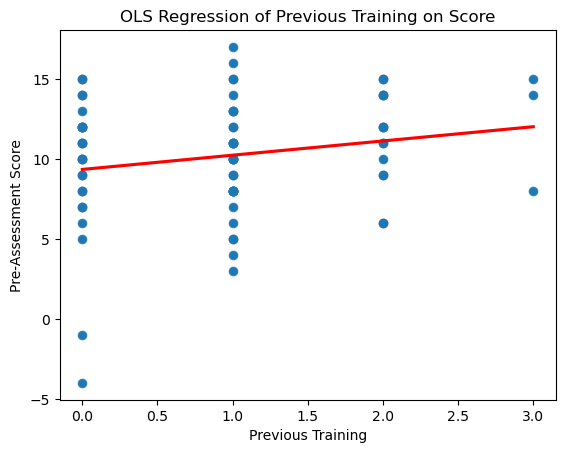

In [54]:
#Creates OLS visualization for training

#Figure 1

import matplotlib.pyplot as plt
import seaborn as sns

# create a scatter plot of the actual data points
sns.scatterplot(x=test['Training'], y=test['SC0'])

# add a line of best fit to the scatter plot
sns.regplot(x=test['Training'], y=test['SC0'], ci=None, line_kws={'color': 'red'})

# set the axis labels and title for the plot
plt.xlabel('Previous Training')
plt.ylabel('Pre-Assessment Score')
plt.title('OLS Regression of Previous Training on Score')

# display the plot
plt.show()



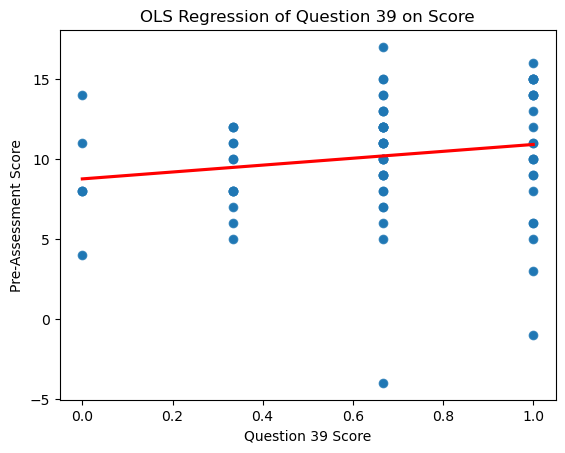

In [56]:
#Figure 2

# create a scatter plot of the actual data points
sns.scatterplot(x=test['q39_answers'], y=test['SC0'])

# add a line of best fit to the scatter plot
sns.regplot(x=test['q39_answers'], y=test['SC0'], ci=None, line_kws={'color': 'red'})

# set the axis labels and title for the plot
plt.xlabel('Question 39 Score')
plt.ylabel('Pre-Assessment Score')
plt.title('OLS Regression of Question 39 on Score')

# display the plot
plt.show()


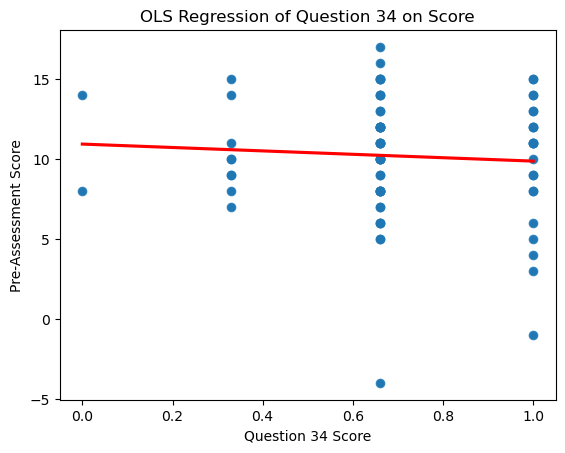

In [58]:
#Figure 3

# create a scatter plot of the actual data points
sns.scatterplot(x=test['q34_answers'], y=test['SC0'])

# add a line of best fit to the scatter plot
sns.regplot(x=test['q34_answers'], y=test['SC0'], ci=None, line_kws={'color': 'red'})

# set the axis labels and title for the plot
plt.xlabel('Question 34 Score')
plt.ylabel('Pre-Assessment Score')
plt.title('OLS Regression of Question 34 on Score')

# display the plot
plt.show()

End of code
